In [452]:
import pandas as pd
import ta

asset = "SPY"

In [453]:
import yfinance as yf

start_date = "2024-03-01"
end_date = "2025-03-01"

prices = yf.Ticker(asset).history(start=start_date, end=end_date, actions=False)
prices

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-01 00:00:00-05:00,501.026689,505.269309,500.613239,504.836182,76805900
2024-03-04 00:00:00-05:00,504.028999,506.165073,503.999439,504.294739,49799300
2024-03-05 00:00:00-05:00,502.266973,502.719807,497.020273,499.254791,72855600
2024-03-06 00:00:00-05:00,502.572125,504.068392,500.475433,501.784637,68382400
2024-03-07 00:00:00-05:00,505.121646,507.828674,501.843664,506.765533,58652100
...,...,...,...,...,...
2025-02-24 00:00:00-05:00,600.214456,601.221436,594.701012,595.418884,50737200
2025-02-25 00:00:00-05:00,595.359070,596.096841,587.791807,592.457764,58266500
2025-02-26 00:00:00-05:00,594.142682,597.781759,590.084881,592.756836,43321600


In [454]:

def add_features(prices):
    indicators = ta.add_all_ta_features(prices, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
    indicators['ema2'] = indicators['Close'].ewm(span=2, adjust=False).mean()
    indicators['ema3'] = indicators['Close'].ewm(span=3, adjust=False).mean()
    indicators['ema4'] = indicators['Close'].ewm(span=4, adjust=False).mean()
    indicators['ema5'] = indicators['Close'].ewm(span=5, adjust=False).mean()
    indicators['ema6'] = indicators['Close'].ewm(span=6, adjust=False).mean()
    indicators['ema7'] = indicators['Close'].ewm(span=7, adjust=False).mean()
    indicators['ema10'] = indicators['Close'].ewm(span=10, adjust=False).mean()
    indicators['ema20'] = indicators['Close'].ewm(span=20, adjust=False).mean()
    indicators['ema50'] = indicators['Close'].ewm(span=50, adjust=False).mean()
    indicators['ema100'] = indicators['Close'].ewm(span=100, adjust=False).mean()
    return indicators.copy()


In [455]:
indicators = add_features(prices)

c:\Users\JW\AppData\Local\pypoetry\Cache\virtualenvs\cryptoto-IqJLIiLB-py3.12\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
C:\Users\JW\AppData\Local\Temp\ipykernel_12532\2668864855.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators['ema100'] = indicators['Close'].ewm(span=100, adjust=False).mean()


In [456]:
indicators

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,ema2,ema3,ema4,ema5,ema6,ema7,ema10,ema20,ema50,ema100
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-01 00:00:00-05:00,501.026689,505.269309,500.613239,504.836182,76805900,6.251629e+07,76805900,0.813952,0.000000e+00,0.000000,...,504.836182,504.836182,504.836182,504.836182,504.836182,504.836182,504.836182,504.836182,504.836182,504.836182
2024-03-04 00:00:00-05:00,504.028999,506.165073,503.999439,504.294739,49799300,2.629799e+07,27006600,0.207717,-2.696348e+07,9.310543,...,504.475220,504.565460,504.619604,504.655701,504.681484,504.700821,504.737737,504.784616,504.814949,504.825460
2024-03-05 00:00:00-05:00,502.266973,502.719807,497.020273,499.254791,72855600,1.056887e+07,-45849000,0.052987,-7.556704e+07,-40.775453,...,500.994934,501.910126,502.473679,502.855398,503.131000,503.339314,503.740838,504.257966,504.596903,504.715150
2024-03-06 00:00:00-05:00,502.572125,504.068392,500.475433,501.784637,68382400,-7.979101e+06,22533400,-0.029790,-4.005789e+07,12.619958,...,501.521403,501.847382,502.198062,502.498478,502.746325,502.950644,503.385165,504.022411,504.486618,504.657120
2024-03-07 00:00:00-05:00,505.121646,507.828674,501.843664,506.765533,58652100,2.983580e+07,81185500,0.091382,7.398949e+06,26.166326,...,505.017490,504.306458,504.025051,503.920829,503.894670,503.904367,503.999778,504.283660,504.575987,504.698871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,600.214456,601.221436,594.701012,595.418884,50737200,9.763677e+08,783226300,0.220947,-1.131826e+08,-65.665451,...,597.549130,599.509629,600.862104,601.751992,602.330449,602.701020,603.113499,602.093950,597.258330,587.463148
2025-02-25 00:00:00-05:00,595.359070,596.096841,587.791807,592.457764,58266500,9.835721e+08,724959800,0.160489,-1.216614e+08,-85.762076,...,594.154886,595.983696,597.500368,598.653916,599.509682,600.140206,601.176093,601.176218,597.070072,587.562051
2025-02-26 00:00:00-05:00,594.142682,597.781759,590.084881,592.756836,43321600,9.703285e+08,768281400,0.103910,-1.024303e+08,35.338166,...,593.222853,594.370266,595.602955,596.688222,597.580297,598.294364,599.645319,600.374372,596.900926,587.664918


In [457]:
target = indicators['Close'].iloc[:-1] - indicators['Close'].shift(-1).iloc[:-1]
indicators = indicators.iloc[:-1]

In [462]:
import yfinance as yf

start_date = "2025-02-01"
end_date = "2025-04-01"

real_prices = yf.Ticker(asset).history(start=start_date, end=end_date, actions=False)

real_indicators = add_features(real_prices)
real_change = real_indicators['Close'].iloc[:-1] - real_indicators['Close'].shift(-1).iloc[:-1]
real_indicators = real_indicators.iloc[:-1]

C:\Users\JW\AppData\Local\Temp\ipykernel_12532\2668864855.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators['ema100'] = indicators['Close'].ewm(span=100, adjust=False).mean()


In [463]:
import optuna
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

common_index = indicators.index.intersection(target.index)
X = indicators.loc[common_index]
y = target.loc[common_index]

def objective(trial):
    params = {
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 5e-3, 5e-2, log=True),
        "max_depth": trial.suggest_int("max_depth", 6, 7),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 3),
        "subsample": trial.suggest_float("subsample", 0.9, 1.0, step=0.1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.9, 1.0, step=0.1),
        "n_estimators": trial.suggest_int("n_estimators", 1000, 1200, step=100),
        "tree_method": "hist",
    }

    model = xgb.XGBRegressor(**params)
    tscv = TimeSeriesSplit(n_splits=3)

    cv_scores = cross_val_score(
        model,
        X,
        y,
        cv=tscv,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )
    
    mse = -1.0 * np.mean(cv_scores)
    return mse


In [464]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best trial:")
print("  Value (MSE):", study.best_trial.value)
print("  Params:", study.best_trial.params)

[I 2025-04-05 06:34:48,315] A new study created in memory with name: no-name-687ad728-53fa-4770-aa39-8091df0377bc
[I 2025-04-05 06:35:04,999] Trial 8 finished with value: -58.41648832856723 and parameters: {'learning_rate': 0.045187143847815754, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.9, 'n_estimators': 1100}. Best is trial 8 with value: -58.41648832856723.
[I 2025-04-05 06:35:07,506] Trial 3 finished with value: -50.89461922108209 and parameters: {'learning_rate': 0.04510655440303051, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 1.0, 'n_estimators': 1100}. Best is trial 8 with value: -58.41648832856723.
[I 2025-04-05 06:35:07,877] Trial 4 finished with value: -44.823124760491005 and parameters: {'learning_rate': 0.01723311322389155, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 1.0, 'n_estimators': 1000}. Best is trial 8 with value: -58.41648832856723.
[I 2025-04-05 06:35:08,476] Tria

Best trial:
  Value (MSE): -65.48637380646396
  Params: {'learning_rate': 0.01887435333837196, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0, 'n_estimators': 1000}


In [465]:
best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X, y)
y_pred = final_model.predict(real_indicators)


In [466]:
np.corrcoef(y_pred, real_change.values)[0, 1]

0.15555971436725935

In [467]:
sum((y_pred > 2) == (real_change.values > 2)) / len(real_change)

0.5384615384615384

In [468]:
import os
os.makedirs("../data/processed/xgb", exist_ok=True)
final_model.save_model(f"../data/processed/xgb/{asset}.json")

In [469]:
df = pd.DataFrame(real_change)
df['predicted_change'] = y_pred

In [470]:
real_indicators[real_indicators.index >= '2025-03-01'].head(3)

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,ema2,ema3,ema4,ema5,ema6,ema7,ema10,ema20,ema50,ema100
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-03 00:00:00-05:00,594.391918,595.548473,578.160777,582.019165,74249200,9.306384e+07,-40706300,0.098388,-1.393160e+08,0.934062,...,584.835041,586.317259,587.627743,588.859442,589.988247,590.995541,593.304062,596.465619,597.359342,596.993221
2025-03-04 00:00:00-05:00,577.971372,583.634329,570.533724,575.129883,109648200,6.035264e+07,-150354500,0.028660,-2.273276e+08,-116.737673,...,578.364935,580.723571,582.628599,584.282922,585.743000,587.029126,589.999666,594.433644,596.487598,596.560283
2025-03-05 00:00:00-05:00,574.960389,583.125828,571.361231,581.311279,71230500,1.096102e+08,-79124000,0.049730,-1.319517e+08,2.634391,...,580.329165,581.017425,582.101671,583.292374,584.476794,585.599665,588.419959,593.183895,595.892448,596.258323


In [471]:
df[df.index >= '2025-03-01']

,Close,predicted_change
Date,,
2025-03-03 00:00:00-05:00,6.889282,-4.141191
2025-03-04 00:00:00-05:00,-6.181396,-5.052884
2025-03-05 00:00:00-05:00,10.318909,-5.231496
2025-03-06 00:00:00-05:00,-3.200317,-5.525582
2025-03-07 00:00:00-05:00,15.293945,-4.377830
2025-03-10 00:00:00-04:00,4.646057,-5.568524
2025-03-11 00:00:00-04:00,-2.941162,-6.145174
2025-03-12 00:00:00-04:00,7.427673,-5.323597
2025-03-13 00:00:00-04:00,-11.355835,-9.024900


In [472]:
TP = sum((y_pred > 0) == (real_change.values > 0))
FP = sum((y_pred > 0) != (real_change.values > 0))
TN = sum((y_pred < 0) == (real_change.values < 0))
FN = sum((y_pred < 0) != (real_change.values < 0))
TP / (TP + FN)


0.48717948717948717

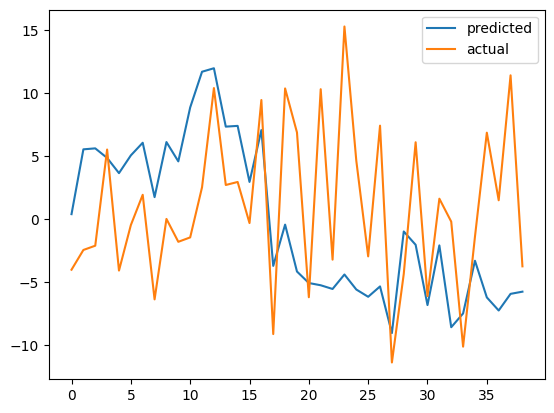

In [473]:
import matplotlib.pyplot as plt

plt.plot(y_pred)
plt.plot(real_change.values)
plt.legend(['predicted', 'actual'])
plt.show()
